In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
alpha = 0.2
beta = 0.7

In [3]:
def c(u,v):
    return np.minimum(u * (v ** (1 - beta)), (u ** (1 - alpha)) * v)

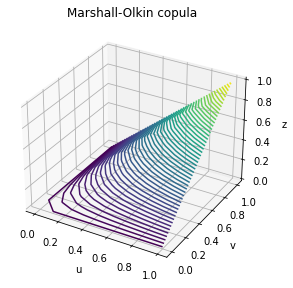

In [12]:
u = np.linspace(0, 1, 10)
v = np.linspace(0, 1, 10)
U, V = np.meshgrid(u, v)
Z = c(U, V)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(U, V, Z, 50, cmap='viridis')
ax.set_xlabel('u')
ax.set_ylabel('v')
ax.set_zlabel('z')
ax.set_title('Marshall-Olkin copula');
plt.tight_layout()
plt.show()

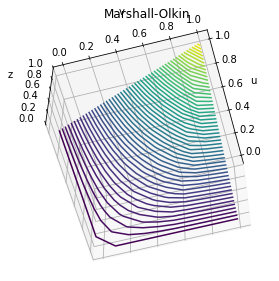

In [5]:
ax.view_init(-60, 15)
fig

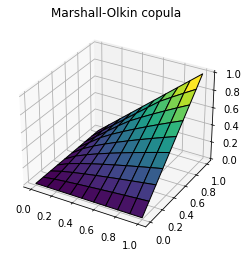

In [13]:
ax = plt.axes(projection='3d')
ax.plot_surface(U, V, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='black')
ax.set_title('Marshall-Olkin copula');

In [7]:
r = np.random.default_rng().uniform(0, 1, 5000)
s = np.random.default_rng().uniform(0, 1, 5000)
t = np.random.default_rng().uniform(0, 1, 5000)

In [8]:
def plot_random_variable(random_variable_1, random_variable_2, random_variable_3):
    _, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 15))    
    
    for ax_1, ax_2, var, name in zip([ax1, ax3, ax5], [ax2, ax4, ax6], [random_variable_1, random_variable_2, random_variable_3], ['r', 's', 't']):
        ax_1.plot(var, 'ob')
        ax_1.set_title(f'Random variable {name}', size=15)
        count, bins, ignored = ax_2.hist(var, 20, density=False)
        ax_2.plot(bins, np.ones_like(bins), linewidth=2, color='r')
        ax_2.set_title(f'Histogram of the {name} samples and PDF', size=15)

    plt.tight_layout()
    plt.show()

In [9]:
def plot_mo(lambdas):
    _, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 10))
    axes = [ax1, ax2, ax3]

    for lambd, ax in zip(lambdas, axes):
        x = np.minimum(-(np.log(r) / lambd[0]), -(np.log(t) / lambd[2]))
        y = np.minimum(-(np.log(s) / lambd[1]), -(np.log(t) / lambd[2]))

        u = np.exp(-(lambd[0] + lambd[2]) * x)
        v = np.exp(-(lambd[1] + lambd[2]) * y)
        ax.scatter(u, v)
        ax.set_title(f'lambda1 = {lambd[0]}, lambda2 = {lambd[1]}, lambda12 = {lambd[2]}')
    
    plt.tight_layout()
    plt.show()

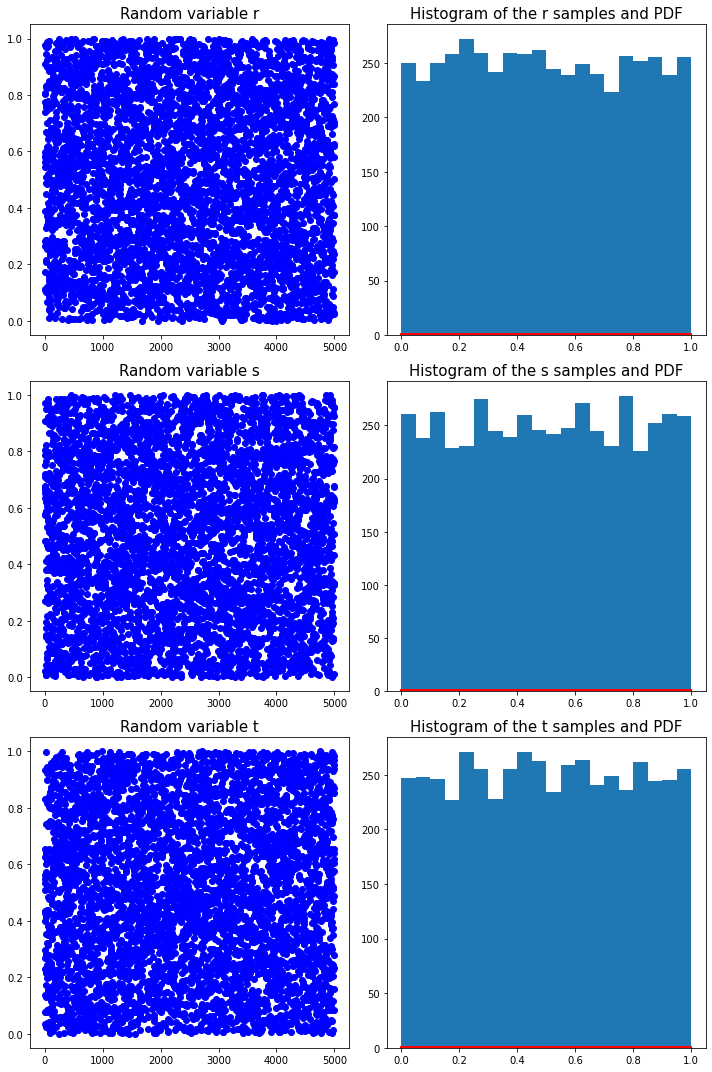

In [10]:
plot_random_variable(r, s, t)

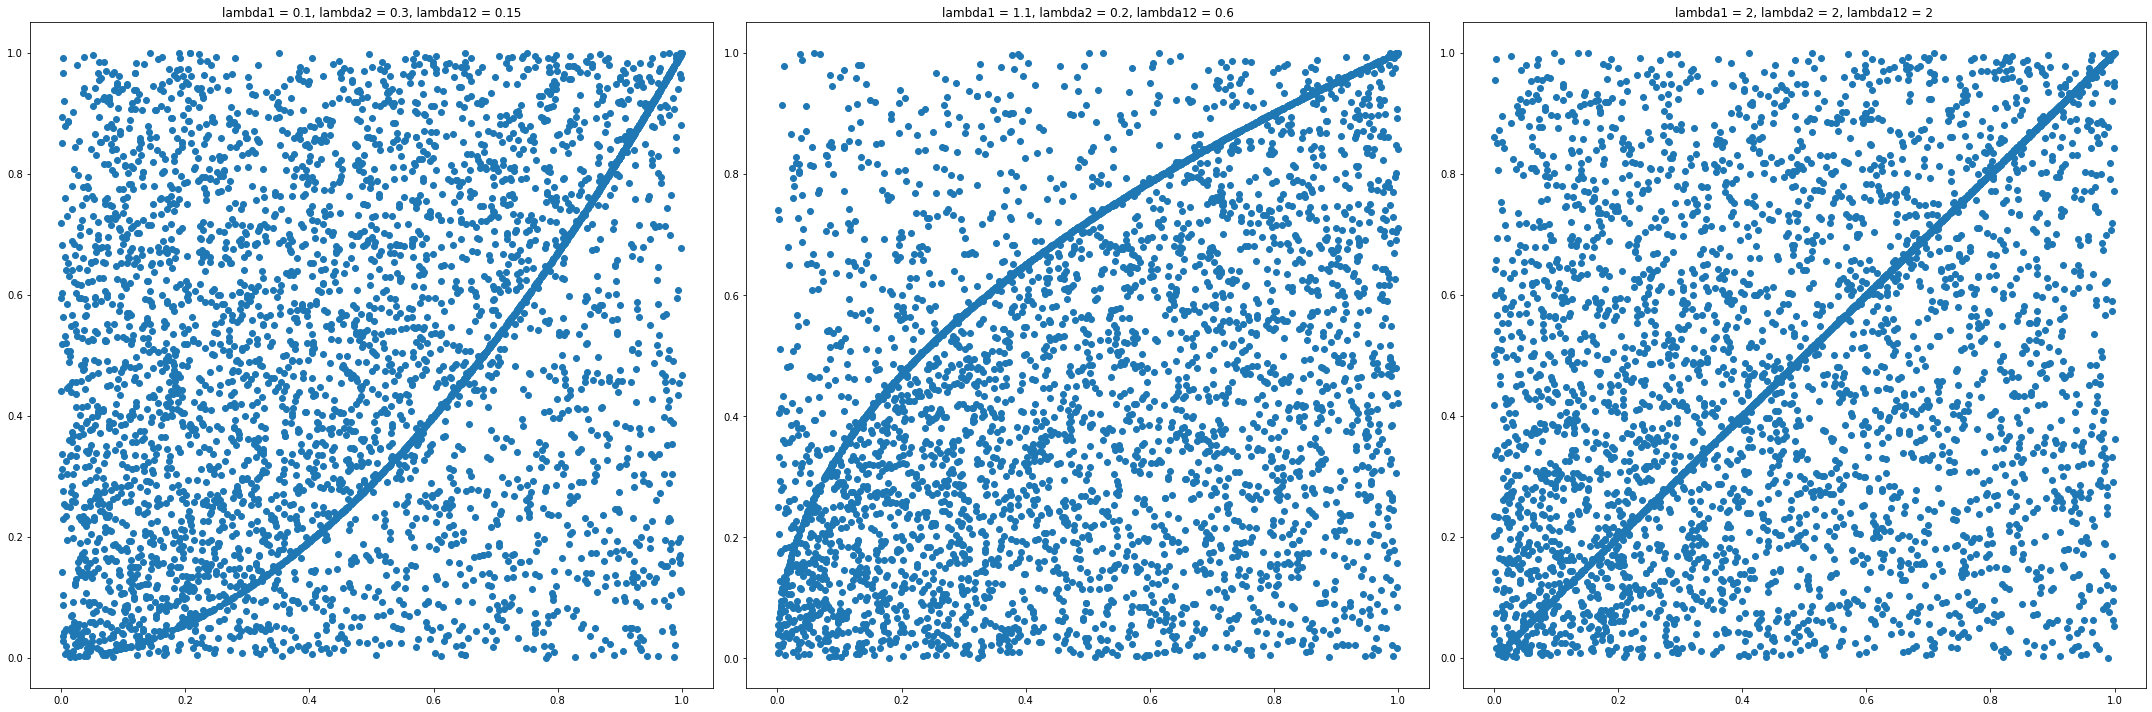

In [11]:
plot_mo([[0.1, 0.3, 0.15], [1.1, 0.2, 0.6], [2, 2,  2]])